In [2]:
import logging as logger
import os
import shutil
import tarfile
from csv import reader
import logging as logger
import os
import shutil
import tarfile
from csv import reader

import cv2
import pandas as pd
import seaborn as sns

In [3]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a dark background
set_style("whitegrid")

In [4]:
from usefun import findangamp,findang
from usefun import mostvalue, possibleaction,findpacman
from usefun import pickaction
from usefun import accuracy

# Data training and predictions

In [5]:
finaldf=pd.read_csv('finaldf.csv')
finaldf

,frame_id,action,gaze_variance0,gaze_variance1,mean_angle,mean_amplitude,start_angle,start_amplitude,end_angle,end_amplitude,com_angle0,com_angle1,0,1,2,3
0,RZ_5037271_4,0,0.035883,0.003952,-107.945729,13.799091,-107.185325,14.126018,-108.034756,13.771982,-72.986692,-162.986692,1,0,1,1
1,RZ_5037271_5,0,0.029144,0.004015,-108.305842,13.905737,-108.019981,13.718247,-108.533426,13.948754,-97.508199,-7.508199,1,0,1,1
2,RZ_5037271_6,0,0.070980,0.008503,-113.643011,11.329768,-112.825956,11.381482,-114.635915,11.287626,97.549158,7.549158,1,1,1,1
3,RZ_5037271_7,0,0.047391,0.008704,-112.911807,11.766484,-114.404793,11.266875,-112.830973,11.946105,95.946701,-174.053299,1,1,1,1
4,RZ_5037271_8,0,0.054097,0.008667,-118.595054,9.801289,-117.223417,10.132558,-118.731446,9.705029,-83.923473,-173.923473,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831,RZ_5037271_17306,2,1.469895,0.012684,114.338379,170.906662,114.227716,173.210204,114.409012,169.460775,107.107439,17.107439,0,1,1,0
14832,RZ_5037271_17307,2,0.355787,0.007117,114.535687,168.796607,114.426354,169.396198,114.754752,167.693789,-90.909502,179.090498,0,1,1,0
14833,RZ_5037271_17308,2,121.790149,0.890204,111.307934,194.162089,114.669279,168.382020,110.389077,199.140620,-91.365272,178.634728,0,1,1,0
14834,RZ_5037271_17309,2,0.362737,0.011814,110.525212,198.067893,110.404123,199.000024,110.641052,197.352773,84.028416,-5.971584,0,1,1,0


## train_test_split

In [7]:
X = finaldf.drop(['action'],axis=1).copy()
y = finaldf['action']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2,
                                                       stratify=y)

In [14]:
test_data=pd.concat([X_test,y_test],axis=1)
test_data.to_csv('test_data.csv',index=False)

In [15]:
X_train=X_train.drop(['frame_id'],axis=1).copy().values
X_test=X_test.drop(['frame_id'],axis=1).copy().values
y_train=y_train.values
y_test=y_test.values

## normal logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)

## fit the model
log_reg.fit(X_train, y_train)
#log_reg.fit(X_train.reshape(-1,1), y_train)

LogisticRegression(max_iter=10000)

In [21]:
log_reg.predict(X_train)
print("Training Accuracy:", accuracy(y_train, log_reg.predict(X_train)))

Training Accuracy: 0.47455342096393666


In [22]:
log_reg.predict(X_test)
print("Testing Accuracy:", accuracy(y_test, log_reg.predict(X_test)))

Training Accuracy: 0.4754043126684636


In [23]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, log_reg.predict(X_test))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,406,7,71,176
Actual 1,166,60,406,111
Actual 2,145,83,535,174
Actual 3,126,3,89,410


## multi-layer in sklearn

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100), max_iter=5000)

In [28]:
mlp1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=5000)

In [29]:
def accuracy(true, predicted):
    return np.sum(true==predicted)/len(predicted)
print("Training Accuracy:", accuracy(y_train, mlp1.predict(X_train)))
print("Testing Accuracy:", accuracy(y_test, mlp1.predict(X_test)))

Training Accuracy: 0.7789855072463768
Testing Accuracy: 0.6061320754716981


In [30]:
mlp1.predict(X_train)

array([0, 3, 1, ..., 3, 3, 0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train, mlp1.predict(X_train))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,2175,209,118,135
Actual 1,131,2336,325,180
Actual 2,312,342,2907,186
Actual 3,317,222,146,1827


In [32]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, mlp1.predict(X_test))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,423,85,76,76
Actual 1,73,437,168,65
Actual 2,111,157,594,75
Actual 3,132,81,70,345


## multilayer using keras

In [33]:
import keras

In [34]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [35]:
md = models.Sequential()

In [36]:
md.add(layers.Dense(14, activation = 'relu',input_shape=(14,)))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(100, activation = 'relu'))
md.add(layers.Dense(4, activation = 'softmax'))

In [37]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 100)               1500      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 4)                 404       
                                                                 
Total params: 22,314
Trainable params: 22,314
Non-trainable params: 0
_________________________________________________________________


In [38]:
md.compile(optimizer='rmsprop', 
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [39]:
from sklearn.model_selection import train_test_split

X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train,
                                                          test_size=.2,
                                                          shuffle=True,
                                                          stratify=y_train,
                                                          random_state=440)

In [40]:
n_epochs = 100
batch_size = 512



history = md.fit(X_train_train, to_categorical(y_train_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/100
19/19 [==============================] - 2s 23ms/step - loss: 1.2939 - accuracy: 0.3658 - val_loss: 1.2060 - val_accuracy: 0.4246
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 1.1816 - accuracy: 0.4264 - val_loss: 1.1492 - val_accuracy: 0.4280
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 1.1419 - accuracy: 0.4415 - val_loss: 1.1174 - val_accuracy: 0.4629
Epoch 4/100
19/19 [==============================] - 0s 7ms/step - loss: 1.1116 - accuracy: 0.4584 - val_loss: 1.0930 - val_accuracy: 0.4444
Epoch 5/100
19/19 [==============================] - 0s 7ms/step - loss: 1.0968 - accuracy: 0.4701 - val_loss: 1.0812 - val_accuracy: 0.4962
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 1.0856 - accuracy: 0.4820 - val_loss: 1.0587 - val_accuracy: 0.4853
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 1.0716 - accuracy: 0.4844 - val_loss: 1.0552 - val_accuracy: 0.4874
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9376 - accuracy: 0.5941 - val_loss: 0.9357 - val_accuracy: 0.6074
Epoch 60/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9334 - accuracy: 0.5982 - val_loss: 0.9546 - val_accuracy: 0.5872
Epoch 61/100
19/19 [==============================] - 0s 7ms/step - loss: 0.9342 - accuracy: 0.5977 - val_loss: 0.9573 - val_accuracy: 0.5842
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9317 - accuracy: 0.6017 - val_loss: 0.9730 - val_accuracy: 0.5788
Epoch 63/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9321 - accuracy: 0.6005 - val_loss: 0.9328 - val_accuracy: 0.6024
Epoch 64/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9303 - accuracy: 0.5967 - val_loss: 0.9584 - val_accuracy: 0.5868
Epoch 65/100
19/19 [==============================] - 0s 6ms/step - loss: 0.9266 - accuracy: 0.6034 - val_loss: 0.9510 - val_accuracy: 0.5977
Epoch 

In [41]:
history_dict = history.history

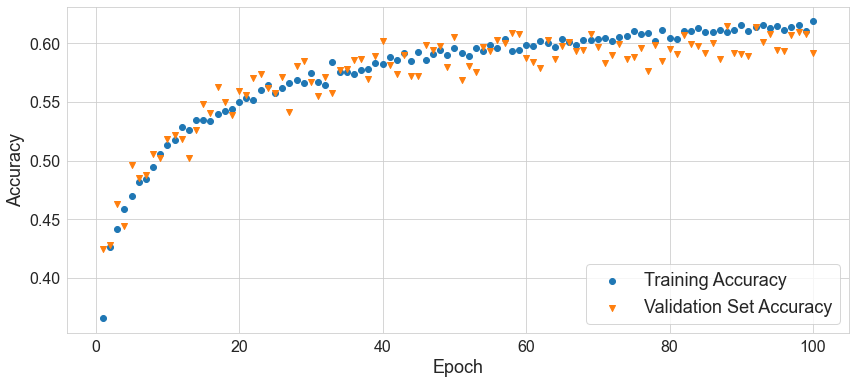

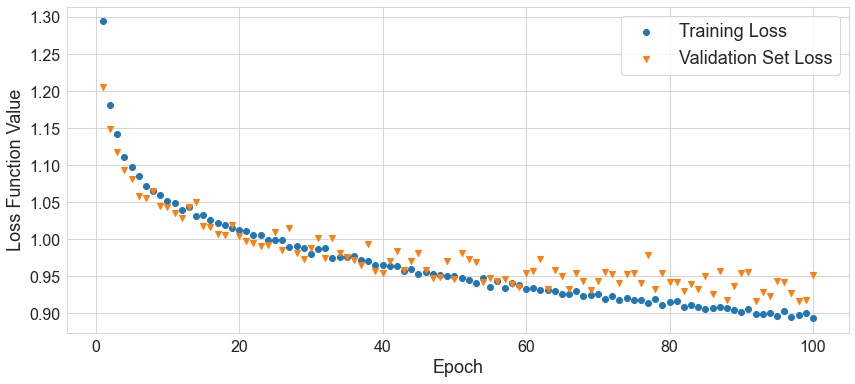

In [42]:
plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], marker='v', label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (14,6))

plt.scatter(range(1,n_epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], marker='v', label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [43]:
pred=np.argmax(md.predict(X_train), axis=1)
pred

371/371 [==============================] - 1s 1ms/step


array([0, 0, 1, ..., 1, 3, 0], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
print('Testing accuracy:',np.round(100*accuracy_score(y_test, np.argmax(md.predict(X_test), axis=1)),2))
print('Training accuracy:',np.round(100*accuracy_score(y_train, np.argmax(md.predict(X_train), axis=1)),2))

93/93 [==============================] - 0s 1ms/step
Testing accuracy: 57.38
371/371 [==============================] - 0s 1ms/step
Training accuracy: 60.15


In [47]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train,np.argmax(md.predict(X_train), axis=1))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

371/371 [==============================] - 0s 1ms/step


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1582,344,199,512
Actual 1,341,2094,216,321
Actual 2,451,1029,1742,525
Actual 3,302,404,85,1721


In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,np.argmax(md.predict(X_test), axis=1))
pd.DataFrame(conf_mat,
                 columns = ['Predicted 0', 'Predicted 1', 'Predicted 2','Predicted 3'],
                 index = ['Actual 0', 'Actual 1', 'Actual 2','Actual 3'])

93/93 [==============================] - 0s 1ms/step


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,376,99,57,128
Actual 1,105,505,63,70
Actual 2,107,284,416,130
Actual 3,78,115,29,406
